<a href="https://colab.research.google.com/github/sunil1206/Data-science-mini-projects/blob/main/IRIS_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Read the dataset to python environment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
iris = pd.read_excel('/content/iris.xls')

In [ ]:
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


check missing values and fill missing values

In [ ]:
iris.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
iris['SL']=iris['SL'].fillna(iris['SL'].mean())
iris['SW']=iris['SW'].fillna(iris['SW'].mean())
iris['PL']=iris['PL'].fillna(iris['PL'].mean())

In [ ]:
iris.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.808480,0.421884,1.725479,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
count= iris.groupby('SW').size()
count

SW
2.000000     1
2.200000     3
2.300000     4
2.400000     3
2.500000     6
2.600000     5
2.700000     9
2.800000    14
2.900000    10
3.000000    26
3.049306     6
3.100000    12
3.200000    13
3.300000     5
3.400000    12
3.500000     4
3.600000     3
3.700000     2
3.800000     6
3.900000     2
4.000000     1
4.100000     1
4.200000     1
4.400000     1
dtype: int64

In [ ]:
iris.skew()
#PW have shows less skew and SL shows maximum

SL    0.314086
SW    0.385446
PL   -0.274334
PW   -0.104997
dtype: float64

In [ ]:
corr=iris.corr()
corr.style.background_gradient(cmap='coolwarm')

,SL,SW,PL,PW
SL,1.000000,-0.099250,0.831400,0.800726
SW,-0.099250,1.000000,-0.413551,-0.340278
PL,0.831400,-0.413551,1.000000,0.936389
PW,0.800726,-0.340278,0.936389,1.000000


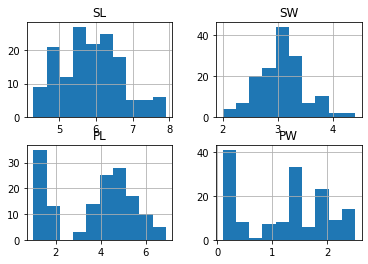

In [ ]:
iris.hist()
plt.show()
#from the shape of the bin. we can easily observe the distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c8804a090>,
      dtype=object)

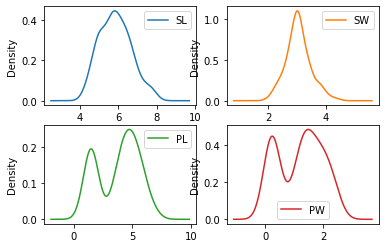

In [ ]:
iris.plot(kind='density',subplots=True,layout=(2,2),sharex=False)

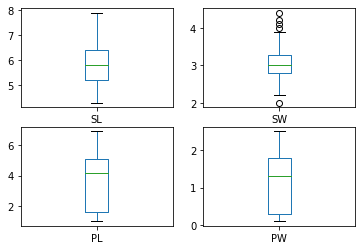

In [ ]:
iris.plot(kind='box',subplots=True,layout=(2,2),sharex=False,sharey=False)
plt.show()
#SW have outliers

2. Do the necessary pre-processing steps

In [ ]:
dummies = pd.get_dummies(iris.Classification)

In [ ]:
dummies

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
iris=pd.concat([iris,dummies],axis=1)

In [ ]:
iris

,SL,SW,PL,PW,Classification,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.100000,3.5,1.40000,0.2,Iris-setosa,1,0,0
1,4.900000,3.0,1.40000,0.2,Iris-setosa,1,0,0
2,5.855944,3.2,1.30000,0.2,Iris-setosa,1,0,0
3,4.600000,3.1,1.50000,0.2,Iris-setosa,1,0,0
4,5.000000,3.6,1.40000,0.2,Iris-setosa,1,0,0
...,...,...,...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,Iris-virginica,0,0,1
146,6.300000,2.5,5.00000,1.9,Iris-virginica,0,0,1
147,6.500000,3.0,3.75625,2.0,Iris-virginica,0,0,1
148,6.200000,3.4,5.40000,2.3,Iris-virginica,0,0,1


In [ ]:
iris.drop(['Classification'], axis=1)

,SL,SW,PL,PW,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.100000,3.5,1.40000,0.2,1,0,0
1,4.900000,3.0,1.40000,0.2,1,0,0
2,5.855944,3.2,1.30000,0.2,1,0,0
3,4.600000,3.1,1.50000,0.2,1,0,0
4,5.000000,3.6,1.40000,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,0,0,1
146,6.300000,2.5,5.00000,1.9,0,0,1
147,6.500000,3.0,3.75625,2.0,0,0,1
148,6.200000,3.4,5.40000,2.3,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Classification']= le.fit_transform(iris['Classification'])
iris.head()

,SL,SW,PL,PW,Classification,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.100000,3.5,1.4,0.2,0,1,0,0
1,4.900000,3.0,1.4,0.2,0,1,0,0
2,5.855944,3.2,1.3,0.2,0,1,0,0
3,4.600000,3.1,1.5,0.2,0,1,0,0
4,5.000000,3.6,1.4,0.2,0,1,0,0


In [ ]:
from sklearn import preprocessing
scale= preprocessing.MinMaxScaler(feature_range=(0,1))
data_rescaled=scale.fit_transform(iris)


In [ ]:
iris

,SL,SW,PL,PW,Classification,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.100000,3.5,1.40000,0.2,0,1,0,0
1,4.900000,3.0,1.40000,0.2,0,1,0,0
2,5.855944,3.2,1.30000,0.2,0,1,0,0
3,4.600000,3.1,1.50000,0.2,0,1,0,0
4,5.000000,3.6,1.40000,0.2,0,1,0,0
...,...,...,...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2,0,0,1
146,6.300000,2.5,5.00000,1.9,2,0,0,1
147,6.500000,3.0,3.75625,2.0,2,0,0,1
148,6.200000,3.4,5.40000,2.3,2,0,0,1


3. Find out which classification model gives the best result (also do random forest algorithm)

In [ ]:
from sklearn.model_selection import train_test_split
X = iris.iloc[:, :-4].values
y = iris.iloc[:, 4].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
#logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predict the values

y_pred = lr.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

print('ACCURACY IS:',accuracy_score(y_test,y_pred))
#print('PRECISION IS:',precision_score(y_test,y_pred))
#print('F1_SCORE IS:',f1_score(y_test,y_pred))
#print('RECALL IS:',recall_score(y_test,y_pred))


ACCURACY IS: 0.9777777777777777


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
model = gnb.fit(X_train,y_train)
pred = gnb.predict(X_test)
print(pred)
from sklearn.metrics import accuracy_score
print('accuracy:',accuracy_score(y_test,pred))

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
accuracy: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [ ]:
#KNN
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
acc_value=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier =KNeighborsClassifier(n_neighbors=k,metric='minkowski')
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc=accuracy_score(y_test,y_pred)
  acc_value.append(acc)

In [ ]:
acc_value

[0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777]

In [ ]:
print('ACCURACY IS:',accuracy_score(y_test,y_pred))

ACCURACY IS: 0.9777777777777777


In [ ]:
 classifier =KNeighborsClassifier(n_neighbors=12,metric='minkowski')
 classifier.fit(X_train,y_train)
 print('ACCURACY IS:',accuracy_score(y_test,y_pred))

ACCURACY IS: 0.9777777777777777


In [ ]:
confusion_matrix(y_test, y_pred)

array([[18,  1,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('ACCURACY IS:',accuracy_score(y_test,y_pred))


ACCURACY IS: 1.0


In [ ]:
result = classification_report(y_test,y_pred)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

